<a href="https://colab.research.google.com/github/MartaGacek1/MonteCarloProject2/blob/main/MonteCarloProjekt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt II - Wprowadzenie do symulacji i metod Monte Carlo

## Marta Gacek

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import time
import math

np.random.seed(123)

S_0 = 100
K = 100
r = 0.05
sigma = 0.25
R = 100000

## 1. Prawdziwa wartość opcji

Ta wartość zostanie wykorzystana do porównywania wyników w przypadkach gdy $n=1$ dla różnych estymatorów.

In [57]:
d1 = (np.log(S_0/K) + r + sigma**2/2)/sigma
d2 = d1 - sigma
real = S_0 * sc.stats.norm.cdf(d1) - K * np.exp(-r) * sc.stats.norm.cdf(d2)
print(real)

12.335998930368717


## 2. Crude Monte Carlo Estimator

### Przypadek $n=1$

In [55]:
import numpy as np

start_time = time.time()

z = np.random.normal(0, 1, R)  # zmienne z rozkładu standardowego normalnego
S_T = S_0 * np.exp(r - (sigma**2)/2 + sigma * z)  # geometryczny ruch Browna
y = np.maximum(S_T - K, 0)
est_I = np.exp(-r) * np.mean(y)

print(f"Estymowana wartość opcji dla n=1 to: {est_I:.4f}")

end_time = time.time()
execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Estymowana wartość opcji dla n=1 to: 12.3066
Czas wykonania: 0.013113 sekund


In [56]:
# Przedział ufności

alpha = 0.05
sig = np.var(y)
left = est_I - (sc.stats.norm.ppf(1-alpha/2) * np.sqrt(sig)/np.sqrt(R))
right = est_I + (sc.stats.norm.ppf(1-alpha/2) * np.sqrt(sig)/np.sqrt(R))
conf_interval = [left, right]
print(conf_interval)
print(f"Szerokość przedziału ufności: {right-left:.4f}")

[12.18569738582271, 12.427511768197448]
Szerokość przedziału ufności: 0.2418


In [59]:
# Błąd bezwzględny

error = np.abs(est_I - real)
print(f"Błąd bezwzględny: {error:.4f}")

Błąd bezwzględny: 0.0294


### Przypadek $n > 1$

In [ ]:
n1 = 2
n2 = 2**2
n3 = 2**4
n4 = 2**7
n5 = 2**10
n6 = 2**12

ests = []

def est(n, S_0 = 100, K = 100, r = 0.05, sigma = 0.25, R = 100000):
  step = 1/n
  z = np.random.normal(0, 1, (R, n))
  prices = np.zeros((R, n))
  prices[:, 0] = S_0
  for t in range(1, n):
    prices[:, t] = prices[:, t-1] * np.exp((r - sigma**2/2) * step + sigma * np.sqrt(step) * z[:, t-1])  # geometryczny ruch Browna
  A_n = np.mean(prices, axis=1)
  y = np.maximum(A_n - K, 0)
  est_I = np.exp(-r) * np.mean(y)
  ests.append(est_I)
  print(f"Estymowana wartość opcji dla n={n} wynosi: {est_I:.4f}")

In [ ]:
start_time = time.time()
print(est(n1))
end_time = time.time()
execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Estymowana wartość opcji dla n=2 wynosi: 4.0336
None
Czas wykonania: 0.015048 sekund


In [ ]:
start_time = time.time()
print(est(n2))
end_time = time.time()
execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Estymowana wartość opcji dla n=4 wynosi: 5.4782
None
Czas wykonania: 0.039517 sekund


In [ ]:
start_time = time.time()
print(est(n3))
end_time = time.time()
execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Estymowana wartość opcji dla n=16 wynosi: 6.4883
None
Czas wykonania: 0.136501 sekund


In [ ]:
start_time = time.time()
print(est(n4))
end_time = time.time()
execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Estymowana wartość opcji dla n=128 wynosi: 6.7970
None
Czas wykonania: 1.297706 sekund


In [ ]:
start_time = time.time()
print(est(n5))
end_time = time.time()
execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Estymowana wartość opcji dla n=1024 wynosi: 6.8153
None
Czas wykonania: 14.026404 sekund


In [ ]:
start_time = time.time()
print(est(n6))
end_time = time.time()
execution_time = end_time - start_time
print(f"Czas wykonania: {execution_time:.6f} sekund")

Estymowana wartość opcji dla n=4096 wynosi: 6.8331
None
Czas wykonania: 58.747688 sekund


Text(0.5, 1.0, 'Crude Monte Carlo Estimator results for n>1')

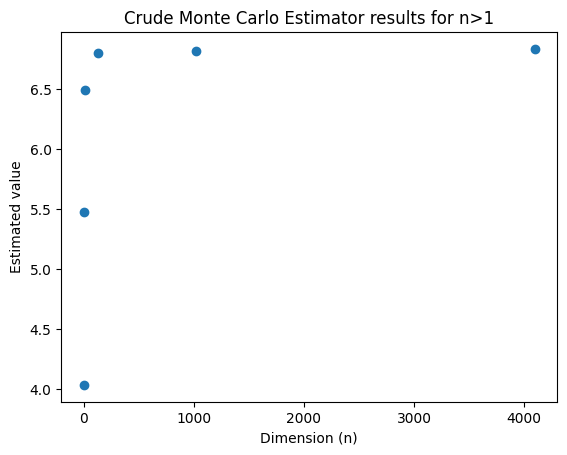

In [ ]:
plt.scatter([n1, n2, n3, n4, n5, n6], ests)
plt.ylabel("Estimated value")
plt.xlabel("Dimension (n)")
plt.title("Crude Monte Carlo Estimator results for n>1")

## 3.Stratified Estimator

### Przypadek $n=1$ - warstwy proporcjonalne


In [ ]:
m = 10

Rj = [math.ceil(R/m) for i in range(m)]

### Przypadek $n=1$ - warstwy optymalne

## 4. Antithetic Estimator

### Przypadek $n=1$

In [63]:
z = np.random.normal(0, 1, int(R))
z_anty = -z  # zmienne antytetyczne
S_T = S_0 * np.exp(r - sigma**2/2 + sigma * z)  # geometryczny ruch Browna
S_T_anty = S_0 * np.exp(r - sigma**2/2 + sigma * z_anty)
y = np.maximum(S_T - K, 0)
y_anty = np.maximum(S_T - K, 0)
est_I = np.exp(-r) * (np.mean(y) + np.mean(y_anty)) / 2  # średnia

print(f"Estymowana wartość opcji to: {est_I:.4f}")

Estymowana wartość opcji to: 12.3135


In [64]:
# Przedział ufności

alpha = 0.05
vec = [i for i in y]
vec.extend(i for i in y_anty)
var_anty_cmc = np.var(vec)/R
var_anty = var_anty_cmc*(1 + np.corrcoef(S_T, S_T_anty)[0,1])
left = est_I - (sc.stats.norm.ppf(1-alpha/2) * np.sqrt(var_anty))
right = est_I + (sc.stats.norm.ppf(1-alpha/2) * np.sqrt(var_anty))
conf_interval = [left, right]
print(conf_interval)
print(f"Szerokość przedziału ufności: {right-left:.4f}")

[12.28368068147508, 12.343350128571878]
Szerokość przedziału ufności: 0.0597


In [65]:
# Błąd bezwzględny

error = np.abs(est_I - real)
print(f"Błąd bezwzględny: {error:.4f}")

Błąd bezwzględny: 0.0225


### 5. Control Variate Estimator

### Przypadek $n=1$

In [81]:
z = np.random.normal(0, 1, int(R))
S_T = S_0 * np.exp(r - sigma**2/2 + sigma * z)  # geometryczny ruch Browna
y = np.maximum(S_T - K, 0)
X = z  # zmienna kontrolna B(1), bo z ~ N(0, 1)
exp_X = 0  # znana wartość oczekiwana zmiennej B(1)
est_I_cmc = np.exp(-r) * np.mean(y)  # Y_R^{CMC} "z daszkiem", wykorzystywany we wzorze
X_R = np.mean(X)  # średnia, czyli X_R "z daszkiem"

c1 = np.cov(y, X)[0, 1]
c2 = np.var(X)
c = c1 / c2  # współczynnik c

est_I = est_I_cmc + c * (X_R - exp_X)

print(f"Estymowana wartość opcji: {est_I:.4f}")

Estymowana wartość opcji: 12.3444


In [82]:
# Przedział ufności

alpha = 0.05
var_cv_cmc = np.var(y)/R
cor = np.corrcoef(S_T, X)[0,1]
var_cv = var_cv_cmc*(1 - cor**2)
left = est_I - (sc.stats.norm.ppf(1-alpha/2) * np.sqrt(var_cv))
right = est_I + (sc.stats.norm.ppf(1-alpha/2) * np.sqrt(var_cv))
conf_interval = [left, right]
print(conf_interval)
print(f"Szerokość przedziału ufności: {right-left:.4f}")

[12.323069135363001, 12.365803884577955]
Szerokość przedziału ufności: 0.0427


In [83]:
# Błąd bezwzględny

error = np.abs(est_I - real)
print(f"Błąd bezwzględny: {error:.4f}")

Błąd bezwzględny: 0.0084
